<a href="https://colab.research.google.com/github/fitsumh/Project1/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 2**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
plt.style.use('ggplot')
sns.set_context('notebook')
sns.set_style('ticks')

## **Dataset**
The dataset '**train.csv**' is obtained from the source below.

**Source:** https://www.kaggle.com/vigneshvenkat/airplane

## **Column Infomation**

AccidentID: unique id assigned to each row  
AccidentTypeCode: the type of accident (factor, not numeric)  
CabinTemperature: the last recorded temperature before the incident, measured in degrees fahrenheit  
TurbulenceIngforces: the recorded/estimated turbulence experienced during the accident  
ControlMetric: an estimation of how much control the pilot had during the incident given the factors at play  
TotalSafetyComplaints: number of complaints from mechanics prior to the accident  
DaysSinceInspection: how long the plane went without inspection before the incident  
SafetyScore: a measure of how safe the plane was deemed to be  
Severity: a description (4 level factor) on the severity of the crash

Turbulence :
Turbulence is an irregular motion of the air resulting from eddies and vertical currents. It may be as insignificant as a few annoying bumps or severe enough to momentarily throw an airplane out of control or to cause structural damage. Turbulence is associated with fronts, wind shear, thunderstorms, etc.

## **Goal**  
The task is to accurately predict the severity of an airplane accident given feature values. The severity is divided into 4 different classes.

## **Data Wrangling**

Importing the dataset and obtaining basic information

In [ ]:
airplane_accident = pd.read_csv('train.csv')

In [ ]:
airplane_accident.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [ ]:
airplane_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 937.6+ KB


Checking missing values

In [ ]:
airplane_accident.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

This dataset is clean.

Obtaining the labels of the unique object 'Severity'

In [ ]:
airplane_accident['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

Label Encoding: Converting the categories of the object 'Severity' into numerical labels according to its severity

In [ ]:
label_severity = {'Minor_Damage_And_Injuries': 0, 'Significant_Damage_And_Serious_Injuries': 1, 
                  'Significant_Damage_And_Fatalities': 2, 'Highly_Fatal_And_Damaging': 3}
airplane_accident['Severity'] = airplane_accident['Severity'].replace(label_severity)
airplane_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Severity                 10000 non-null  int64  
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
 11  Accident_ID              10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


Dropping the variable 'Accident_ID'

In [ ]:
accident = airplane_accident.drop(columns=['Accident_ID'])
accident.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric'],
      dtype='object')

Target Variable: 'Severity'  
Feature Variables: 10 variables in the dataset 'accident' other than 'Severity'

## **Data Visualization**

Work on the relationships between the target variable 'Severity' and each or pairs of the feature variables.

Showing the counts of the labels of the target variable 'Severity'

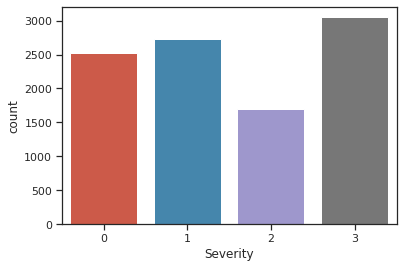

In [ ]:
sns.countplot(data=accident, x='Severity')
plt.show()

Displaying the boxplots of the feature variables over the target variable 'Severity' for variances

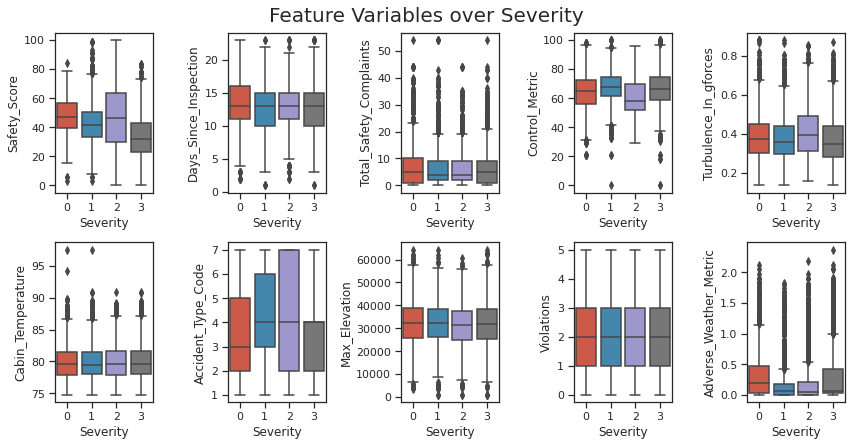

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=[12,6])

for i in range(5):
  sns.boxplot(x=accident['Severity'], y=accident.iloc[:, i+1], ax=axes[0, i])
  sns.boxplot(x=accident['Severity'], y=accident.iloc[:, i+1+5], ax=axes[1, i])

fig.suptitle('Feature Variables over Severity', y=1.03, size=20)
fig.tight_layout()
plt.show()

Some pairs have no or little variances while other pairs have moderate to big variances. It seems that it is worth working on classifications.

Displaying the heatmap for correlations

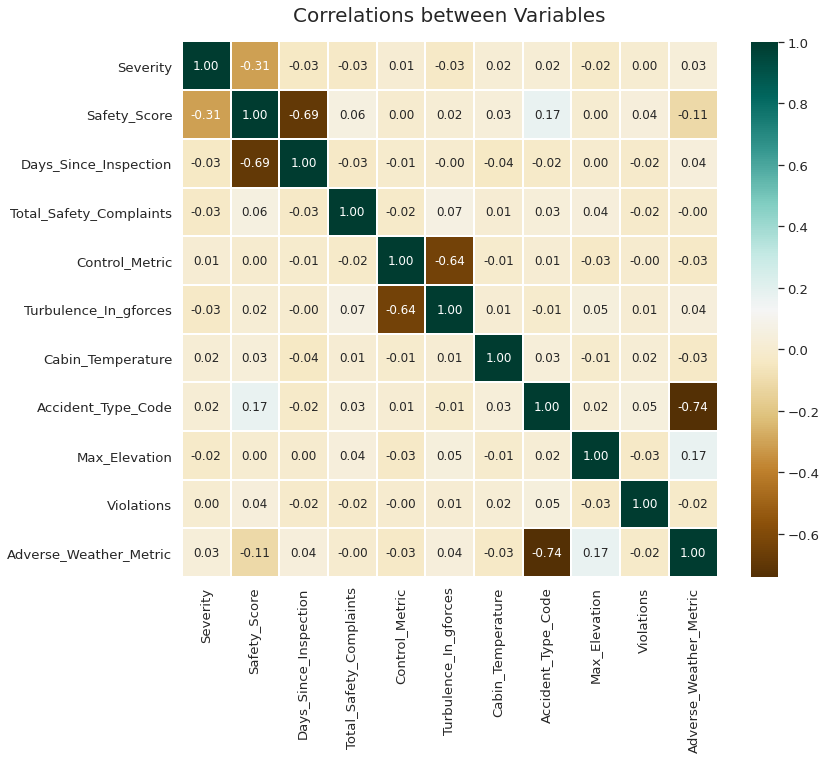

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=[12,12])
sns.heatmap(ax=ax, data=accident.corr(), annot=True, square=True,  fmt='.2f', 
            annot_kws={'size':12}, cbar_kws={"shrink": .82}, cmap='BrBG', linewidths=1)
ax.set_title('Correlations between Variables', size=20, pad=20)
plt.show()

There are three pairs of the feature variables that have (moderately) strong negative correlations, but there is no pairs of the target variable 'Severity' with other feature variables that have strong correlations.

Displaying the scatter plots of the pairs of the feature variables by coloring according to the target variable

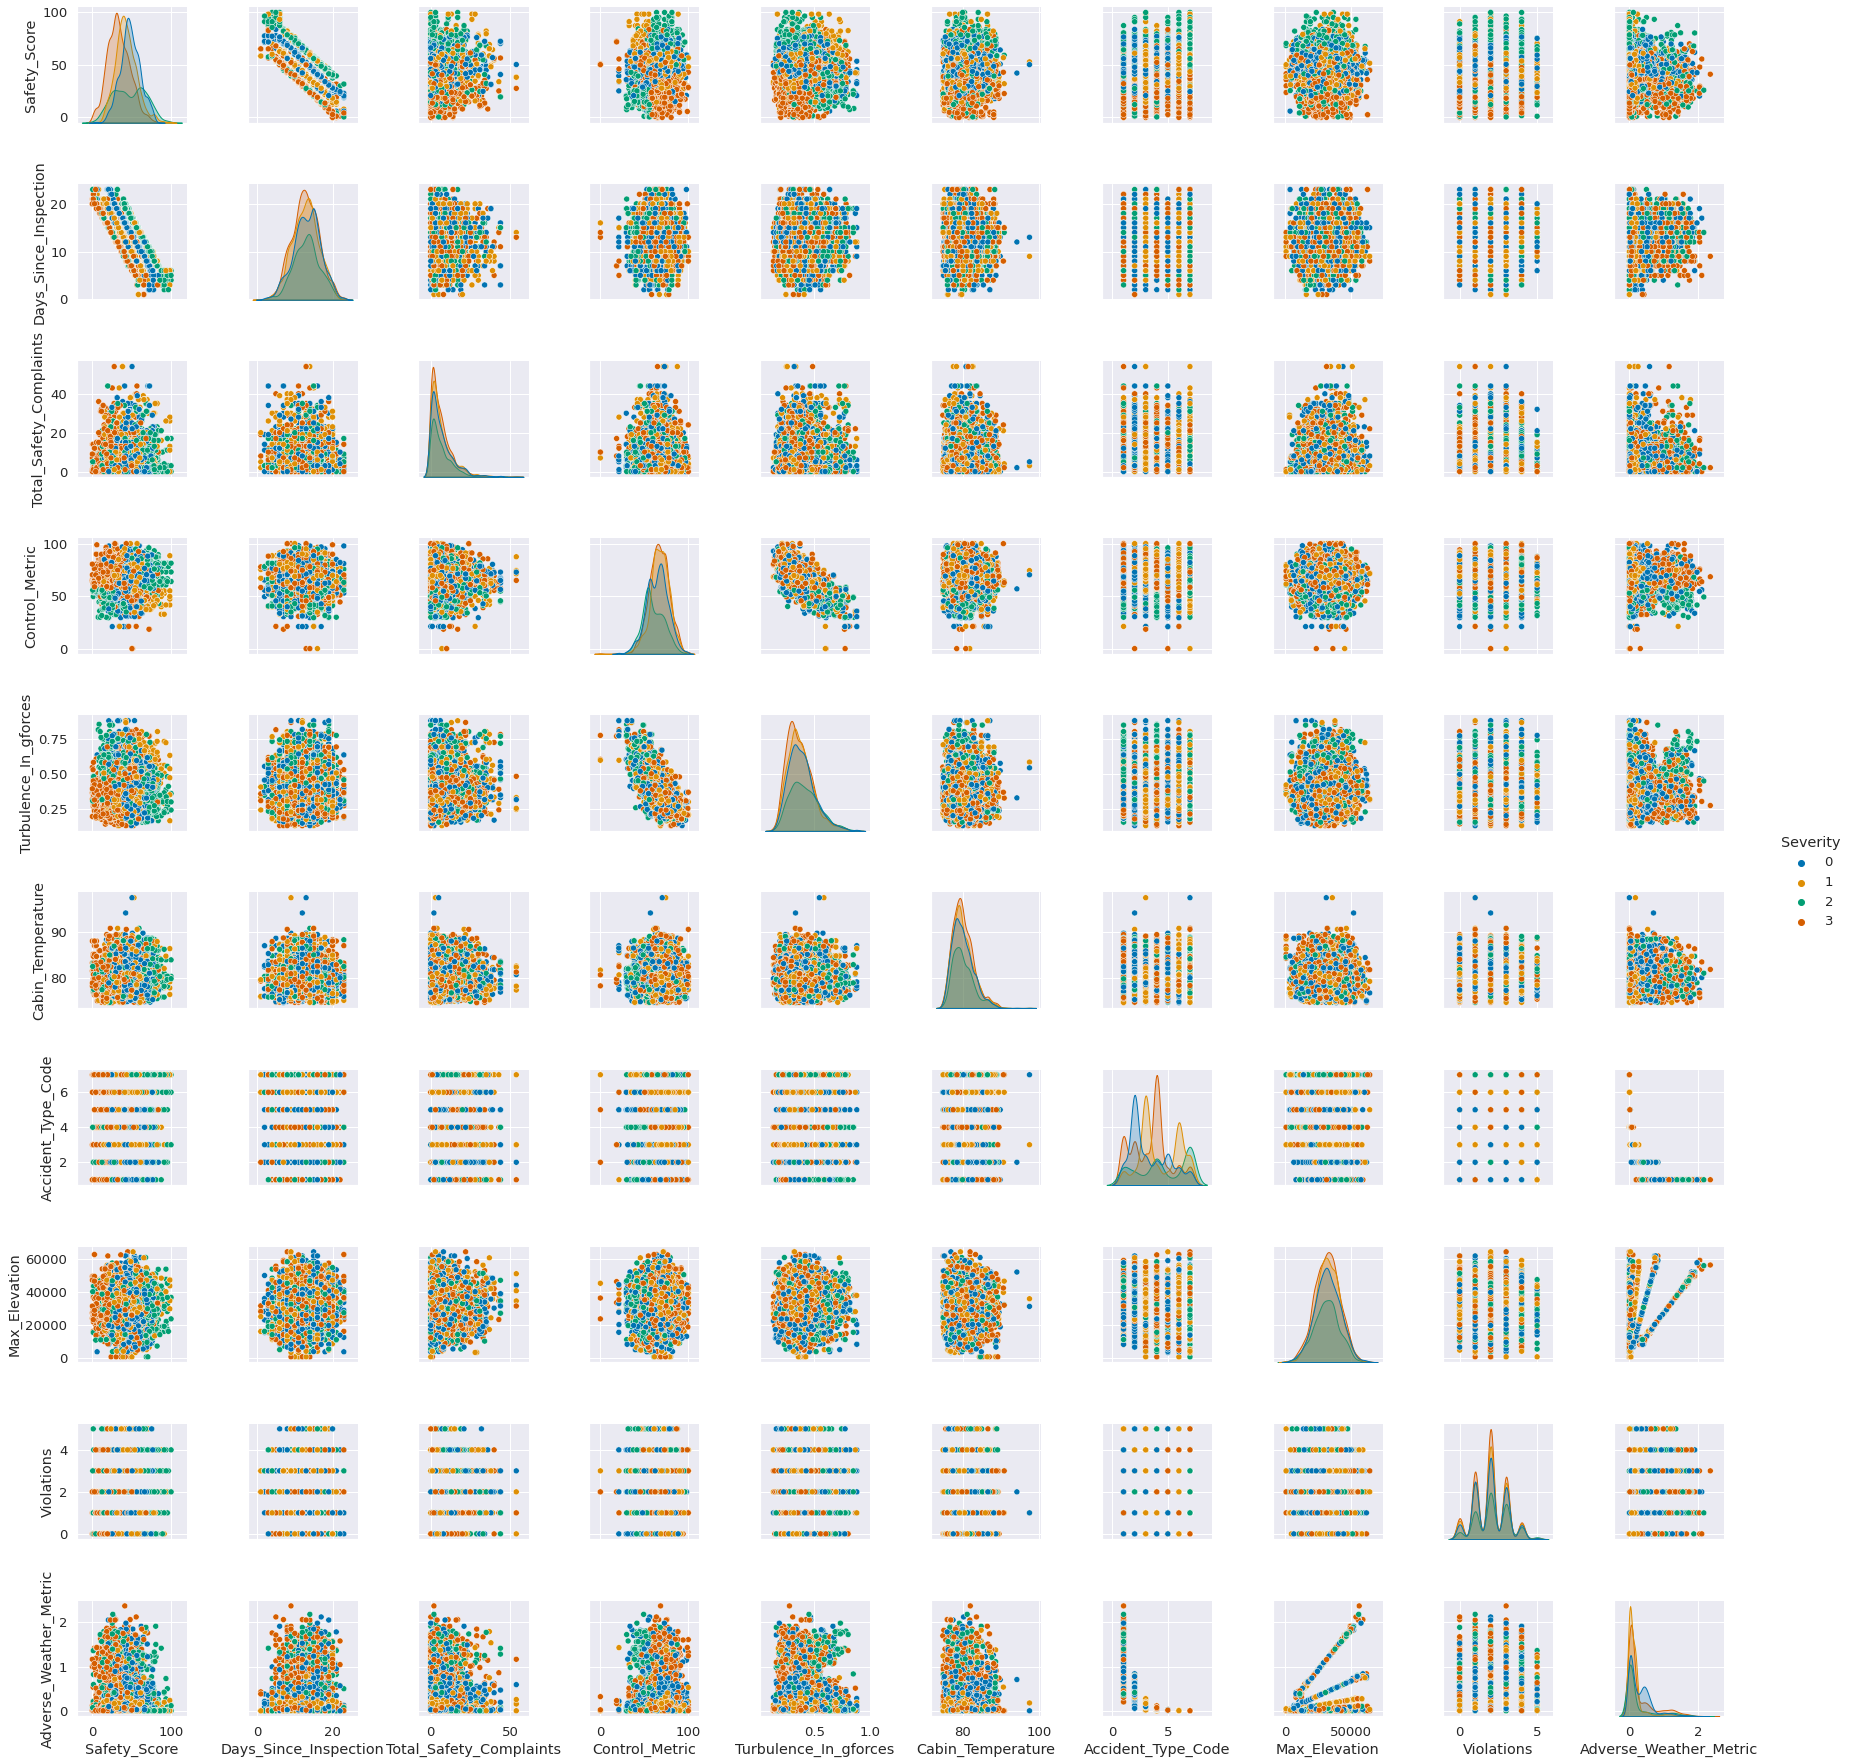

In [ ]:
sns.pairplot(data=accident, hue='Severity', palette='colorblind')
plt.show()

In the pair plots, the four colors representing the 4 classes of severity are mostly mixed and spread.

## **Multi-Class Classification**

Use a keras multi-class classification to develop and evaluate neural network models to predict the severity given feature values and tune the parameters and hyperparameters for better loss and accuracy

Splitting the dataset into a feature dataset and a target dataset

In [ ]:
X = accident.drop(columns=['Severity'])
y = accident['Severity']

In [ ]:
X.head(), y[:10]

(   Safety_Score  Days_Since_Inspection  ...  Violations  Adverse_Weather_Metric
 0     49.223744                     14  ...           3                0.424352
 1     62.465753                     10  ...           2                0.352350
 2     63.059361                     13  ...           3                0.003364
 3     48.082192                     11  ...           1                0.211728
 4     26.484018                     13  ...           2                0.176883
 
 [5 rows x 10 columns], 0    0
 1    0
 2    2
 3    1
 4    2
 5    0
 6    3
 7    0
 8    3
 9    1
 Name: Severity, dtype: int64)

One Hot Encoding: Converting a class vector with integers to a binary class matrix (creating dummy variables from a categorical variable)

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
y[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]], dtype=float32)

Splitting the feature and target datasets into train/test sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7500, 10), (7500, 4), (2500, 10), (2500, 4))

Reproducible results: Forcing the “random” initialization of the weights to be generated based on the seed

In [ ]:
import tensorflow as tf
import random
import os

# Before random seeds, the code below is necessary for any reproducibility for certain hash based algorithms
#os.environ['PYTHONHASHSEED'] = '0'

# When running code on a GPU, some operations have non-deterministic outputs due to the fact that 
# GPUs run many operations in parallel, and so the order of execution is not always guaranteed. 
# Avoid the non-deterministic operations by forcing the code to run on a CPU by the following
os.environ['CUDA_VISIBLE_DEVICES'] = ''

# random seed for Numpy
#np.random.seed(6)

# random seed for Python
#random.seed(6)

# random seed for TensorFlow
tf.random.set_seed(1)

Defining a keras neural network model with an input layer of 10 inputs, two hidden layers, and a 4-neuron output layer: Batch normalization is to standardizes the inputs (it is useful for tens of layers)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

In [ ]:
model = Sequential()
model.add(Dense(64, input_shape=(10,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='tanh'))
model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 132       
Total params: 3,300
Trainable params: 3,108
Non-trainable params: 192
_________________________________________________________________


Compiling the model with 'adam' activation and 'categorical_crossentropy' loss function (this loss function is used for a multi-class classification)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training the model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=128) # default batch size = 32

Epoch 1/50
59/59 [==============================] - 0s 1ms/step - loss: 1.3348 - accuracy: 0.3712
Epoch 2/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2734 - accuracy: 0.4040
Epoch 3/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2773 - accuracy: 0.4127
Epoch 4/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2459 - accuracy: 0.4455
Epoch 5/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2532 - accuracy: 0.4345
Epoch 6/50
59/59 [==============================] - 0s 1ms/step - loss: 1.1886 - accuracy: 0.4855
Epoch 7/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2331 - accuracy: 0.4911
Epoch 8/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2730 - accuracy: 0.4268
Epoch 9/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2177 - accuracy: 0.4992
Epoch 10/50
59/59 [==============================] - 0s 1ms/step - loss: 1.2292 - accuracy: 0.4943
Epoch 11/50
59/59 [

The losses and accuracies are getting better if the number of epochs is increasing. Also, it is checked that increasing the batch size, the number of hidden layers and the number of neurons of each layer can make the loss and accuracy better.

Obtaining the loss and accuracy for the test sets

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=64)

40/40 [==============================] - 0s 721us/step - loss: 1.6475 - accuracy: 0.5296


In [ ]:
print('Loss: {:5.4f} | Accuracy: {:5.2f}%'.format(loss, accuracy*100))

Loss: 1.6475 | Accuracy: 52.96%


As expected, the loss of the test sets is higher than the train losses at the end of the training and the accuracy of the test sets is lower than the train accuracies at the end of the training. 

Predicting the model for the test set

In [ ]:
predictions = model.predict(X_test)
predictions[:5]

array([[6.06635392e-01, 5.07651130e-03, 3.84949356e-01, 3.33878328e-03],
       [6.80946641e-07, 3.64273325e-12, 9.99992847e-01, 6.38564734e-06],
       [5.18460984e-05, 1.11345564e-07, 9.98959541e-01, 9.88487620e-04],
       [7.38052905e-01, 1.31921563e-02, 2.28791058e-01, 1.99639108e-02],
       [8.64458084e-01, 4.74397745e-03, 1.23069048e-01, 7.72886258e-03]],
      dtype=float32)

Converting the predinctions into multiple binary classes

In [ ]:
y_predicted = [x[:11].round() for x in predictions]
y_predicted[:5]

[array([1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., 0.], dtype=float32)]

Comparing the predicted values and the actual y test values

In [ ]:
print('{:10} | {}'.format('predicted', 'expected'))
for i in range(10):
  print('{} | {}'.format(y_predicted[i], y_test[i]))

predicted  | expected
[1. 0. 0. 0.] | [0. 0. 1. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[1. 0. 0. 0.] | [0. 0. 1. 0.]
[1. 0. 0. 0.] | [0. 0. 1. 0.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[0. 0. 1. 0.] | [0. 0. 0. 1.]
[1. 0. 0. 0.] | [0. 1. 0. 0.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[0. 0. 0. 1.] | [0. 0. 0. 1.]


In summary, this keras multi-class classification model is good to predict the severity given feature values, but it is needed to tune the parameters and hyperparameters.

## **Decision Tree**

Now, use a decision tree classification to develop and evaluate for the dataset

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [ ]:
# Creating a decision tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", random_state=66)  # default criterion is 'gini'

# Training the classifier
clf.fit(X_train, y_train)

# Predicting the response for test dataset
y_pred = clf.predict(X_test)

Comparing the predicted values and the actual y test values

In [ ]:
print('{:10} | {}'.format('predicted', 'expected'))
for i in range(10):
  print('{} | {}'.format(y_pred[i], y_test[i]))

predicted  | expected
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[0. 0. 1. 0.] | [0. 0. 1. 0.]
[1. 0. 0. 0.] | [0. 0. 1. 0.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[0. 0. 0. 1.] | [0. 0. 0. 1.]
[0. 1. 0. 0.] | [0. 1. 0. 0.]
[1. 0. 0. 0.] | [1. 0. 0. 0.]
[0. 0. 0. 1.] | [0. 0. 0. 1.]


It looks good. But it could be overfitting when you train the classifier to the end of the tree. 

Finding the accuracy for the entire decision tree.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print('Accuracy: {:5.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 93.00%


Plotting a decision tree

In [ ]:
plt.style.use('default')
from sklearn import tree

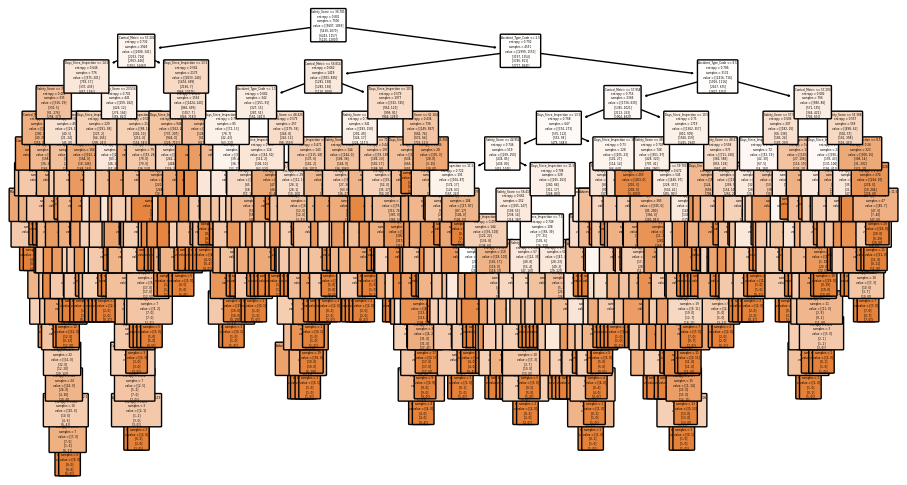

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names = X.columns, class_names=[0, 1, 2, 3], fontsize=2)
plt.show()

Optimizing the tree by limiting the number of layers

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=66)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: {:5.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 28.84%


The accuracy is not good, but it becomes better when the number of layers is increased.

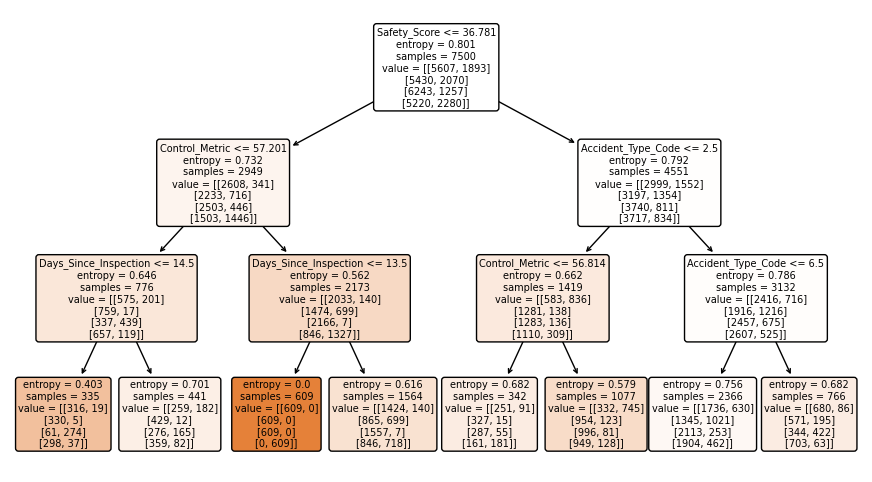

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))
tree.plot_tree(clf, filled=True, rounded=True, feature_names = X.columns, class_names=[0, 1, 2, 3], fontsize=7)
plt.show()

Increasing the max depth to get better accuracy, but not showing the tree

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=66)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: {:5.2f}%'.format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy: 61.80%


Feature Importance
Here we calculate and plot the feature importance scores of our features. Feature importance scores give us insight into the data, and variables that influence our prediction model.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [ ]:
clf.feature_importances_

array([0.31562411, 0.18096085, 0.        , 0.32397341, 0.        ,
       0.        , 0.17944163, 0.        , 0.        , 0.        ])

In [ ]:
df=pd.DataFrame({'Feature_names': X.columns, 'Importances': clf.feature_importances_}) # also possible to order the importances using df.sort_values(by='Importances')
df

,Feature_names,Importances
0,Safety_Score,0.315624
1,Days_Since_Inspection,0.180961
2,Total_Safety_Complaints,0.000000
3,Control_Metric,0.323973
4,Turbulence_In_gforces,0.000000
5,Cabin_Temperature,0.000000
6,Accident_Type_Code,0.179442
7,Max_Elevation,0.000000
8,Violations,0.000000
9,Adverse_Weather_Metric,0.000000


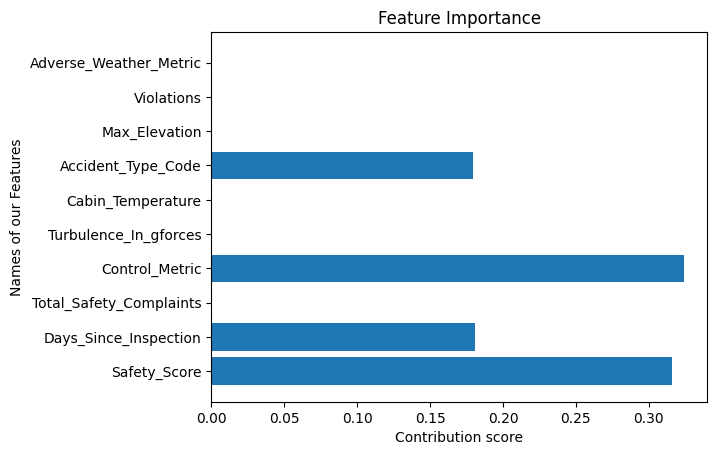

In [ ]:
plt.barh(df['Feature_names'], df['Importances'], align='center')
plt.xlabel("Contribution score") # Names of our Features
plt.ylabel("Names of our Features") # Contribution to the prediction
plt.title("Feature Importance") 
plt.show()

Our results suggest six of ten features are being important to the prediction.